# Basic usage

## Protobuf file: What is it, where to get one?

`Pyrosm` is designed to work with Protocolbuffer Binary Format (PBF) -files. This file format is a commonly used and efficient method to serialize and compress structured data which is also used by OpenStreetMap contributors to distribute the OSM data. Retrieving OSM data in such format can be done for example by using the data dumps provided by [**Geofabrik**](http://download.geofabrik.de/). 

## Reading data from PBF

Using `pyrosm` is straightforward. Following sections introduce how to parse various kind of datasets from OSM Protobuf files. 

### Read street networks


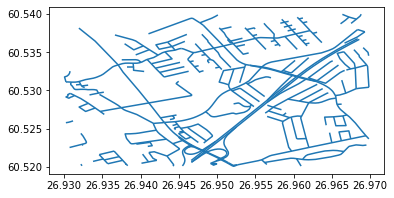

In [1]:
from pyrosm import OSM
from pyrosm import get_path

# Pyrosm comes with a couple of test datasets 
# that can be used straight away without
# downloading anything
fp = get_path("test_pbf")

# Initialize the OSM parser object
osm = OSM(fp)

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

### Read buildings

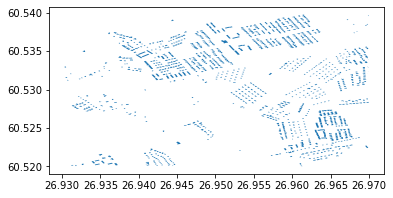

In [2]:
# Read all residential and retail buildings
# =========================================
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
custom_filter = {'building': ['residential', 'retail']}
buildings = osm.get_buildings(custom_filter=custom_filter)
buildings.plot()

### Read Points of Interest

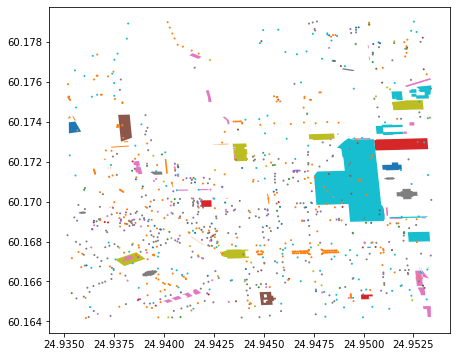

In [3]:
# Read POIs such as shops and amenities 
# =====================================
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
custom_filter = {'amenity': True, 'shop': True }
pois = osm.get_pois(custom_filter=custom_filter)
ax = pois.plot(column='amenity', markersize=1, figsize=(14,6))

### Read landuse

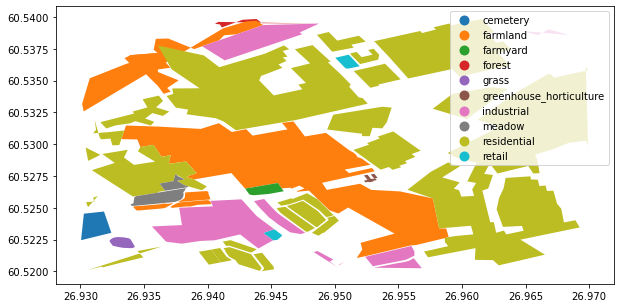

In [4]:
# Read landuse
# ============
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
landuse = osm.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

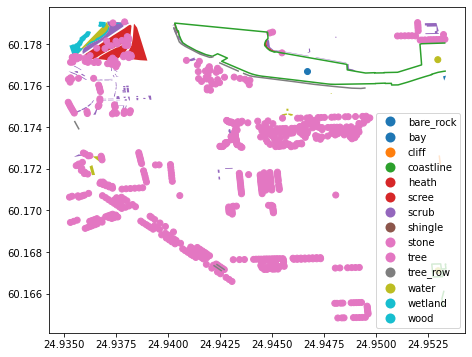

In [5]:
# Read natural
# ============
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))

### Read OSM data with custom filter

Pyrosm also allows making custom queries. For example, to parse all transit related OSM elements you can use following approach 
and create a custom filter combining multiple criteria:

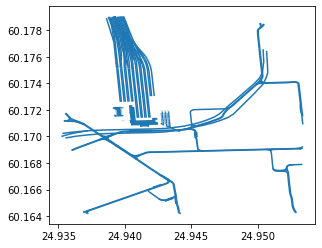

In [6]:
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

# Test reading all transit related data (bus, trains, trams, metro etc.)
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_osm_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)
transit.plot()